In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r'D:\GIT\Online Projects\Datasets\car_prediction_data.csv'
data = pd.read_csv(path)
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.shape

(301, 9)

In [4]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
data.duplicated().sum()

2

In [7]:
df=data.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
# i dont need car name column for the prediction so i drop the car name col
drop_df = df.drop('Car_Name',axis=1)
drop_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
# number of years 
drop_df['No_of_Years'] = 2021 - df['Year']
new_df = drop_df.drop('Year',axis=1)
new_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [11]:
dum_df = pd.get_dummies(new_df,drop_first=True)

In [12]:
dum_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


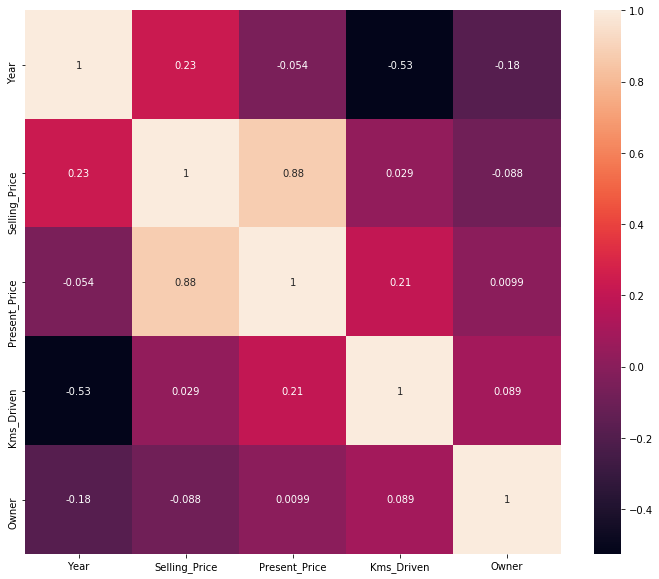

In [13]:
# check correlations
plt.figure(figsize=(12,10))
cormap = df.corr()
sns.heatmap(cormap,annot=True)
plt.show()  # present price and selling price have 0.88 percent correlations

In [14]:
# y, x variables devide
X = dum_df.iloc[:,1:]
y = dum_df.iloc[:,0]   # selling price is response varable

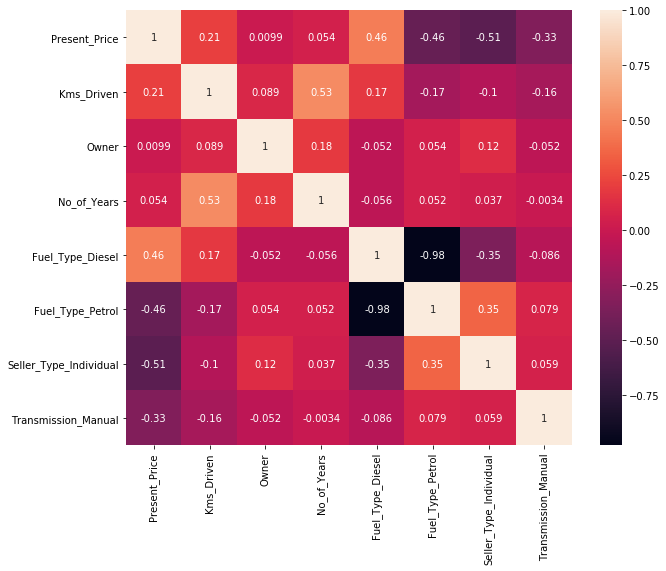

In [15]:
# checking multicollinearity among x variables
plt.figure(figsize=(10,8))
cormap = X.corr()
sns.heatmap(cormap,annot=True)
plt.show()  # no high correlations

In [16]:
X.head(),y.head()

(   Present_Price  Kms_Driven  Owner  No_of_Years  Fuel_Type_Diesel  \
 0           5.59       27000      0            7                 0   
 1           9.54       43000      0            8                 1   
 2           9.85        6900      0            4                 0   
 3           4.15        5200      0           10                 0   
 4           6.87       42450      0            7                 1   
 
    Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
 0                 1                       0                    1  
 1                 0                       0                    1  
 2                 1                       0                    1  
 3                 1                       0                    1  
 4                 0                       0                    1  ,
 0    3.35
 1    4.75
 2    7.25
 3    2.85
 4    4.60
 Name: Selling_Price, dtype: float64)

# Feature importance

In [17]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [18]:
list(model.feature_importances_)    # show array as list

[0.4352155045584289,
 0.03888219274631407,
 0.0009134725400863018,
 0.08658686010803036,
 0.08545936294691622,
 0.022461138635549487,
 0.23580550512801102,
 0.09467596333666366]

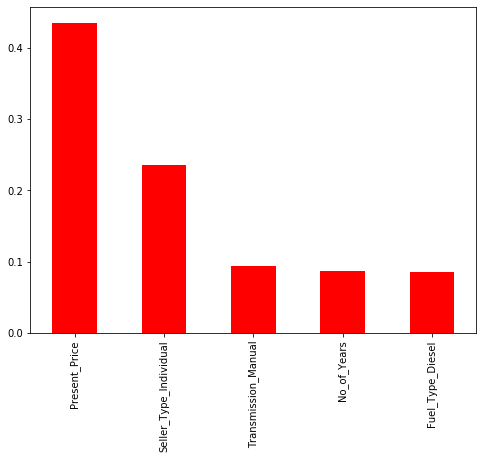

In [19]:
plt.figure(figsize=(8,6))
feature_imp = pd.Series(model.feature_importances_,index=X.columns)
feature_imp.nlargest().plot(kind='bar',color='r')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)